# Sequence properties

Import some required modules.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

We are interested in the properties of sequences of items drawn from a given finite set.  For convenience the set we consider are integers in $A = [0, n - 1}$ which obviously has $n$ elements.  The length of a sequence of elements drawn from $A$ is denoted by $k$.

## Unique numbers

Define a function to generate a sequence of $k$ random integers, independently drawn with uniform probability distribution over $[0, n - 1]$.

In [2]:
def create_random_list(k, n):
    return np.random.choice(np.arange(0, n), k)

Define a function that computes the average fraction of unique numbers in a sequence of length $k$ over a number of independent runs $M$.

In [3]:
def avg_unique_frac(k, n, M=1000):
    avg = 0.0
    for _ in range(M):
        seq = create_random_list(k, n)
        avg += len(set(seq))/len(seq)
    return avg/M

Define a list of sequence lengths to compute the statitstics for.

In [4]:
k_values = [1] + list(range(10, 200, 10)) + list(range(200, 2001, 200))

Compute and plot the fractions of unique elements for $n = 40$ and $n = 80$.

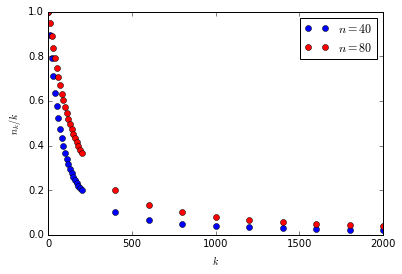

In [5]:
M = 1000
n = 40
unique_fracs = [avg_unique_frac(k, n, M) for k in k_values]
plt.plot(k_values, unique_fracs, 'bo', label='$n = {0}$'.format(n))
n = 80
unique_fracs = [avg_unique_frac(k, n, M) for k in k_values]
plt.plot(k_values, unique_fracs, 'ro', label='$n = {0}$'.format(n))
plt.xlim(0, k_values[-1])
plt.xlabel(r'$k$')
plt.ylim(0.0, 1.0)
plt.ylabel(r'$n_k/k$')
plt.legend();

The expected number of unique items when drawing a length $k$ sequence from $n$ possible items is given by $n_k = \frac{n^k - (n - 1)^k}{n^{k-1}}$, hence the fraction of unique items is $\frac{n_k}{k}$.

In [5]:
def theor_unique_frac(k, n):
    return (n**k - (n - 1)**k)/(k*n**(k - 1))

Plot the emperical values and the theoretical curve to compare.

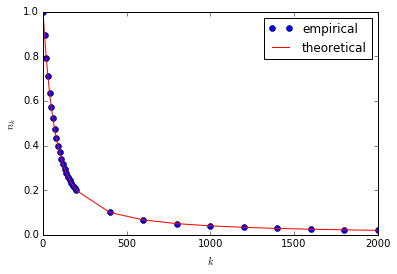

In [12]:
M = 1000
n = 40
unique_fracs = [avg_unique_frac(k, n, M) for k in k_values]
plt.plot(k_values, unique_fracs, 'bo', label='empirical')
theor_unique_fracs = [theor_unique_frac(k, n) for k in k_values]
plt.plot(k_values, theor_unique_fracs, 'r-', label='theoretical')
plt.xlim(0, k_values[-1])
plt.xlabel(r'$k$')
plt.ylim(0.0, 1.0)
plt.ylabel(r'$n_k/k$')
plt.legend();

## Distribution of non-unique numbers

Define a function that for a given length computes the distribution of occurrences.

In [36]:
def count_distr(data, n):
    counts = np.zeros(n, dtype=np.int)
    for x in data:
        counts[x] += 1
    c_distr = np.zeros(len(data) + 1)
    for count in counts:
        c_distr[count] += 1
    return c_distr

In [37]:
seq = create_random_list(10, 5)
seq, count_distr(seq, 5)

(array([1, 1, 2, 2, 0, 4, 2, 0, 2, 1]),
 array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [38]:
def check_count(counts, k):
    values = np.arange(0, len(counts), dtype=np.int)
    return k == np.sum(values*counts)

In [39]:
k = 10
n = 5
seq = create_random_list(k, n)
counts = count_distr(seq, n)
check_count(counts, k)

True

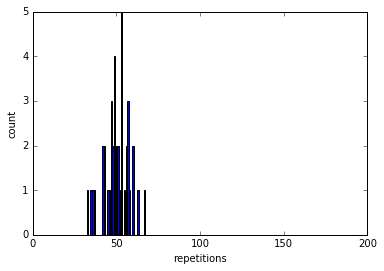

In [46]:
k = 2000
n = 40
seq = create_random_list(k, n)
counts = count_distr(seq, n)
values = np.arange(0, len(counts), dtype=np.int)
plt.bar(values, counts, align='center')
plt.xlabel('repetitions')
plt.xlim(0, 200)
plt.ylabel('count');

In [43]:
def avg_count_distr(k, n, M=1000):
    counts = np.zeros(k + 1, dtype=np.float)
    for _ in range(M):
        seq = create_random_list(k, n)
        counts += count_distr(seq, n)
    return counts/M

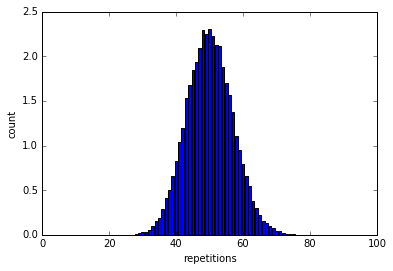

In [47]:
k = 2000
n = 40
counts = avg_count_distr(k, n)
values = np.arange(0, len(counts), dtype=np.int)
plt.bar(values, counts, align='center')
plt.xlabel('repetitions')
plt.xlim(0, 100)
plt.ylabel('count');

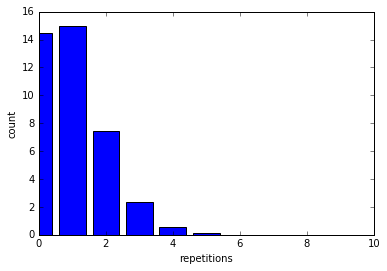

In [49]:
k = 40
n = 40
counts = avg_count_distr(k, n)
values = np.arange(0, len(counts), dtype=np.int)
plt.bar(values, counts, align='center')
plt.xlabel('repetitions')
plt.xlim(0, 10)
plt.ylabel('count');